# Credit Card Transactions Fraud Detection

## Data Preparation

#### Dataset:


<b>This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration of 2 years 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.
This was generated using Sparkov Data Generation | Github tool created by Brandon Harris. 
    
This simulation was run for the duration - 1 Jan 2019 to 31 Dec 2020. The files were combined and converted into a standard format.
    
There are 2 files, test and train, from which train has 1,296,675 rows and 23 columns, and test has 555,719 rows and 23 columns.</b>

Dataset url: https://www.kaggle.com/kartik2112/fraud-detection/download


In [1]:
#Import Librarires

import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format', '{:f}'.format)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
#Read train & test datasets and combine them into single dataframe
df_train = pd.read_csv("../Datasets/fraudTrain.csv")
df_train = df_train.drop(df_train.columns[0], axis=1)

df_test = pd.read_csv("../Datasets/fraudTest.csv")
df_test = df_test.drop(df_test.columns[0], axis=1)

df = pd.concat([df_train,df_test])
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### Inspect Data 

In [3]:
# data set variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

In [4]:
#Checking for null values
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
# data description
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000
mean,417386038393710400.000000,70.063567,48813.258191,38.539311,-90.227832,88643.674509,1358674218.834364,38.538976,-90.227940,0.005210
std,1309115265318734848.000000,159.253975,26881.845966,5.071470,13.747895,301487.618344,18195081.387560,5.105604,13.759692,0.071992
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027422,-166.671575,0.000000
25%,180042946491150.000000,9.640000,26237.000000,34.668900,-96.798000,741.000000,1343016823.750000,34.740122,-96.899440,0.000000
50%,3521417320836166.000000,47.450000,48174.000000,39.354300,-87.476900,2443.000000,1357089331.000000,39.368900,-87.440694,0.000000
75%,4642255475285942.000000,83.100000,72042.000000,41.940400,-80.158000,20328.000000,1374581485.250000,41.956263,-80.245108,0.000000
max,4992346398065154048.000000,28948.900000,99921.000000,66.693300,-67.950300,2906700.000000,1388534374.000000,67.510267,-66.950902,1.000000


In [6]:
# merged data set shape
df.shape

(1852394, 22)

### Check for class imbalance

In [7]:
df_fraud=df[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=(df_fraud['count']/df_fraud['count'].sum())*100
df_fraud

,is_fraud,count,percentage
0,0,1842743,99.478999
1,1,9651,0.521001


- is_fraud is the traget variable. 0 indicates 'no', and 1 indicates 'yes'
- target variable classes are highly imbalanced 

In [8]:
#Find unique values in each column
df.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

### Feature Engineering

In [9]:
# convert 'trans_date_trans_time' to 'datetime'
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df.dtypes['trans_date_trans_time']

dtype('<M8[ns]')

In [10]:
# derive 'trans_hour' feature from 'trans_date_trans_time'
df['trans_hour'] = df['trans_date_trans_time'].dt.hour

# derive Day of Week' Feature from 'trans_date_trans_time'
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()

# derive 'year_month' feature from 'trans_date_trans_time'
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')

In [11]:
# inspect datafrae with derived features
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01


In [12]:
#Derive Age of the Customer: 
# Age of Customer = (Trasaction Date - DOB)

# convert 'dob' to datetime.
df['dob'] = pd.to_datetime(df['dob']) 

# calculate age
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))
df['age'].describe()

count   1852394.000000
mean         46.266173
std          17.412388
min          14.000000
25%          33.000000
50%          44.000000
75%          57.000000
max          96.000000
Name: age, dtype: float64

In [13]:
# convert categorical variables using One Hot-Encoding
category_ohe = pd.get_dummies(df.category, prefix='category', drop_first=False)
gender_ohe = pd.get_dummies(df.gender, prefix='gender', drop_first=False)
day_of_week_ohe = pd.get_dummies(df.day_of_week, prefix='week',drop_first=False)

In [14]:
# concatenate convrted categorical variables with the dataset
df1 = pd.concat([df, category_ohe,gender_ohe,day_of_week_ohe], axis=1)

In [15]:
df1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,week_Friday,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


In [16]:
# define function haversine
"""
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

"""

def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):

    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [17]:
# derive 'dist' using haversine function
df1['dist'] = \
    haversine(df1['lat'], df1['long'],
                 df1['merch_lat'], df1['merch_long'])

In [18]:
# inspect 'dist' feature
df1['dist'].describe()

count   1852394.000000
mean         76.111726
std          29.116970
min           0.022255
25%          55.320087
50%          78.216380
75%          98.509467
max         152.117173
Name: dist, dtype: float64

In [19]:
# inspect features data type
df1.dtypes

trans_date_trans_time      datetime64[ns]
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
trans_hour                          int64
day_of_week                       

In [20]:
# inspect feature names
df1.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour', 'day_of_week', 'year_month',
       'age', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_F', 'gender_M',
       'week_Friday', 'week_Monday', 'week_Saturday', 'week_Sunday',
       'week_Thursday', 'week_Tuesday', 'week_Wednesday', 'dist'],
      dtype='object')

##### Derive Historic Transaction Variables

In [21]:
df1.index = pd.to_datetime(df1['trans_date_trans_time'])
df1 = df1.rename_axis(index={'trans_date_trans_time': 'time_index'})
df1 = df1.sort_index()
df1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,week_Friday,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist
time_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,78.597568
2019-01-01 00:00:44,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,30.212176
2019-01-01 00:00:51,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,108.206083
2019-01-01 00:01:16,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,95.673231
2019-01-01 00:03:06,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,77.556744


In [22]:
df1['val_for_agg'] = 1

##### 60 days transactions by customer

In [23]:
# count of historic orders within 60 days by cc_num
df_hist_trans_60d = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('60D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

# define dataframe columns
df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']

In [24]:
df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date

In [25]:
df_hist_trans_60d = df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()

In [26]:
# dsplay top 5 rows of dataframe
df_hist_trans_60d.head()

,cc_num,trans_date,hist_trans_60d
0,60416207185,2019-01-01,0.000000
1,60416207185,2019-01-02,1.000000
2,60416207185,2019-01-03,5.000000
3,60416207185,2019-01-04,7.000000
4,60416207185,2019-01-05,9.000000


##### 24 hours order by customer

In [27]:
# count of historic orders within 24h by cc_num
df_hist_orders_24h = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

# define dataframe columns
df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

In [28]:
# dsplay top 5 rows of dataframe
df_hist_orders_24h.head()

,cc_num,trans_date_trans_time,hist_trans_24h
0,60416207185,2019-01-01 12:47:15,0.000000
1,60416207185,2019-01-02 08:44:57,1.000000
2,60416207185,2019-01-02 08:47:36,2.000000
3,60416207185,2019-01-02 12:38:14,3.000000
4,60416207185,2019-01-02 13:10:46,4.000000


##### 24 hrs fraud historic transactions

In [29]:
df_hist_fraud_trans_24h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_24h']

In [30]:
df_hist_fraud_trans_24h.head()

,cc_num,trans_date_trans_time,hist_fraud_trans_24h
0,60416207185,2019-03-01 01:32:53,0.000000
1,60416207185,2019-03-01 02:42:25,1.000000
2,60416207185,2019-03-01 23:06:58,2.000000
3,60416207185,2019-03-02 22:10:38,3.000000
4,60416207185,2019-03-02 22:10:59,2.000000


#### 2 Hours Fraud by Customers

In [31]:
df_hist_fraud_trans_2h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('2H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_2h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_2h']

In [32]:
df_hist_fraud_trans_2h.head()

,cc_num,trans_date_trans_time,hist_fraud_trans_2h
0,60416207185,2019-03-01 01:32:53,0.000000
1,60416207185,2019-03-01 02:42:25,1.000000
2,60416207185,2019-03-01 23:06:58,2.000000
3,60416207185,2019-03-02 22:10:38,1.000000
4,60416207185,2019-03-02 22:10:59,1.000000


##### 60 Day Orders Amt Avg by Customers

In [33]:
df_hist_trans_amt_avg_60d = \
    df1 \
    .groupby(['cc_num'])['amt']\
    .rolling('60D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']

In [34]:
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date

In [35]:
df_hist_trans_amt_avg_60d = df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])\
['hist_trans_avg_amt_60d'].min().reset_index()

In [36]:
df_hist_trans_amt_avg_60d.head(10)

,cc_num,trans_date,hist_trans_avg_amt_60d
0,60416207185,2019-01-01,0.000000
1,60416207185,2019-01-02,7.270000
2,60416207185,2019-01-03,35.188333
3,60416207185,2019-01-04,31.365714
4,60416207185,2019-01-05,40.378889
5,60416207185,2019-01-06,43.053636
6,60416207185,2019-01-07,48.005000
7,60416207185,2019-01-08,60.016154
8,60416207185,2019-01-09,70.423125
9,60416207185,2019-01-10,69.753889


###### Merge Historical Variables with Transactions by ['cc_num','trans_date_trans_time']

In [37]:
df1['trans_date'] = df1['trans_date_trans_time'].dt.date

In [38]:
df2 = df1.merge(df_hist_trans_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [39]:
df2 = df2.merge(df_hist_orders_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_2h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [40]:
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']]= \
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']].fillna(0)

In [41]:
df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,week_Friday,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,78.597568,1,2019-01-01,1.000000,6.000000,0.000000,0.000000,4.970000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,30.212176,1,2019-01-01,1.000000,1.000000,0.000000,0.000000,47.488421
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,108.206083,1,2019-01-01,8.000000,5.000000,0.000000,0.000000,377.925000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,95.673231,1,2019-01-01,1.000000,5.000000,0.000000,0.000000,45.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,77.556744,1,2019-01-01,1.000000,6.000000,0.000000,0.000000,41.960000


In [42]:
# subtract 'hist_fraud_trans_2h' from 'hist_fraud_trans_24h'
df2['hist_fraud_trans_24h'] = df2['hist_fraud_trans_24h'] - df2['hist_fraud_trans_2h']

In [43]:
# inspect columns
df2_cols = df2.columns
print(' number of features: ', len(df2_cols))
print('Features:\n', df2_cols)

 number of features:  57
Features:
 Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour', 'day_of_week', 'year_month',
       'age', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_F', 'gender_M',
       'week_Friday', 'week_Monday', 'week_Saturday', 'week_Sunday',
       'week_Thursday', 'week_Tuesday', 'week_Wednesday', 'dist',
       'val_for_agg', 'trans_date', 'hist_trans_60d', 'hist_trans_24h',
       'hist_fraud_trans_24h', 'hist_fraud_trans_2h',

##### Feature selection

In [44]:
# features to exclude

excl_cols = ['trans_date_trans_time', 'cc_num', 'merchant', 'category','first', 'last', 'gender', 'street', 
             'city', 'state', 'zip', 'lat','long', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
             'merch_long','day_of_week', 'year_month', 'val_for_agg', 'trans_date']

In [45]:
# selected features 
cols = [c for c in df2_cols if c not in excl_cols]
print(' number of selected features: ', len(cols),'\n')
print('Selected features: \n', cols)

 number of selected features:  34 

Selected features: 
 ['amt', 'city_pop', 'is_fraud', 'trans_hour', 'age', 'category_entertainment', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'gender_F', 'gender_M', 'week_Friday', 'week_Monday', 'week_Saturday', 'week_Sunday', 'week_Thursday', 'week_Tuesday', 'week_Wednesday', 'dist', 'hist_trans_60d', 'hist_trans_24h', 'hist_fraud_trans_24h', 'hist_fraud_trans_2h', 'hist_trans_avg_amt_60d']


In [46]:
# correlation
corr = df2[cols].corr()

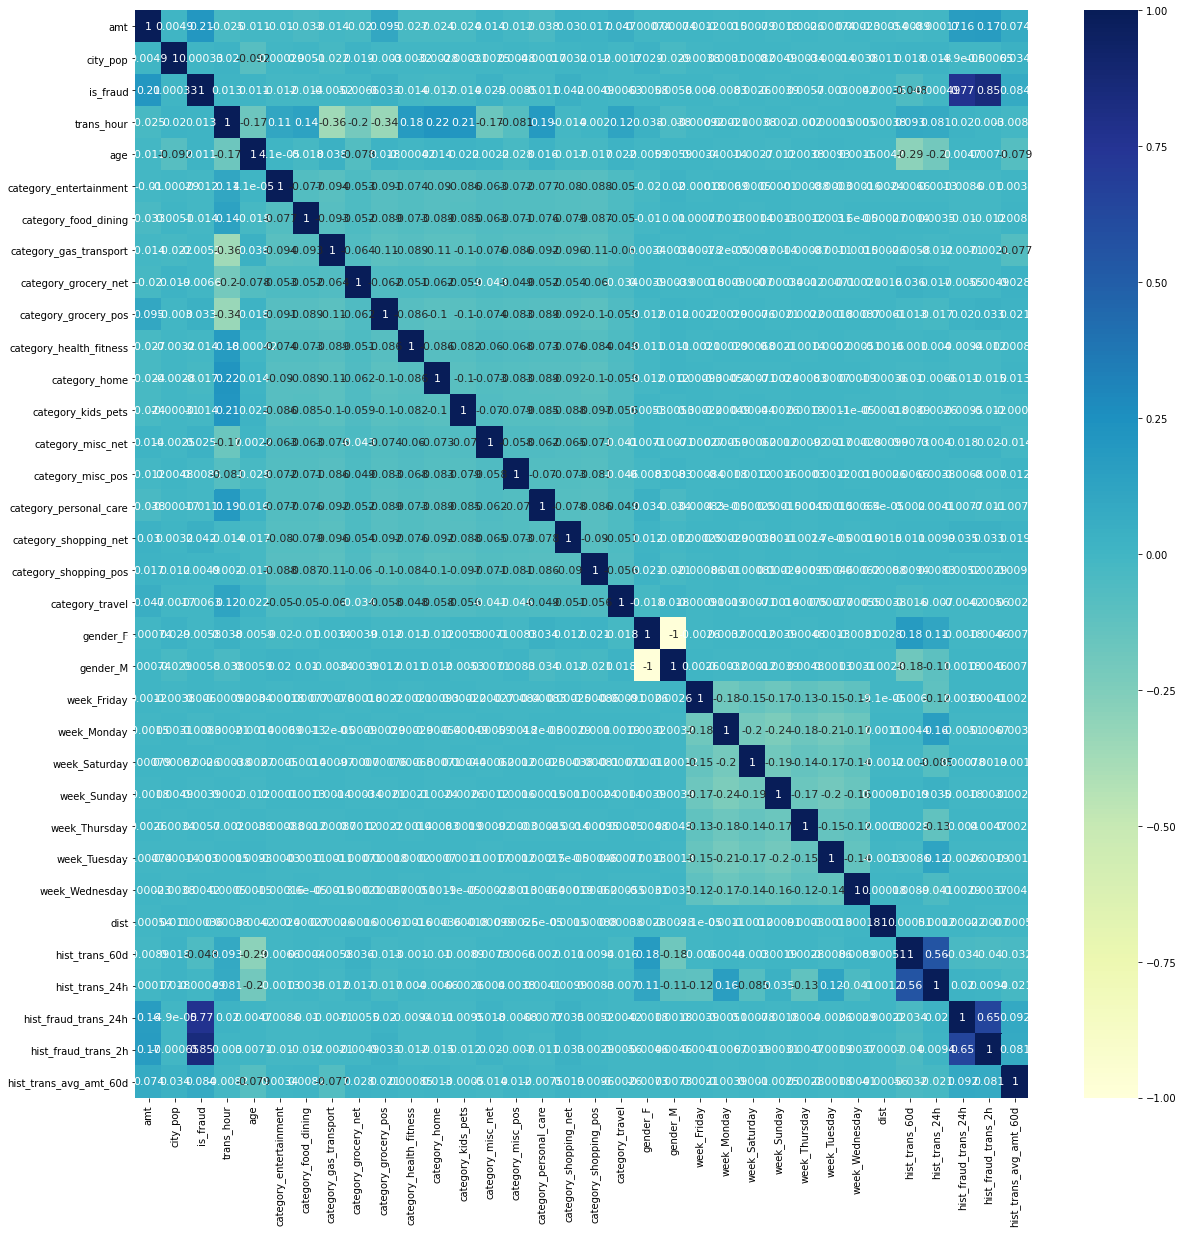

In [47]:
# plot correlation

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap = "YlGnBu", annot_kws={"size": 11})
plt.show()

hist_fraud_trans_2h is highly correlated with is_fraud - 0.85
hist_fraud_trans_24h is highly correlated with is_fraud - 0.77

hist_trans_24h is also correlated with hist_trans_60d   - 0.56

#### Remove class imbalance

In [48]:
# This dataset has severe class imbalance 
# To balance by over sampling
cnt_non_fraud = df2[df2['is_fraud'] == 0]['amt'].count()
df2_class_fraud = df2[df2['is_fraud'] == 1]
df2_class_nonfraud = df2[df2['is_fraud'] == 0]

In [49]:
#OverSampling
df2_class_fraud_oversample = df2_class_fraud.sample(cnt_non_fraud, replace=True)
df2_oversampled = pd.concat([df2_class_nonfraud, df2_class_fraud_oversample], axis=0)

print('Random over-sampling:')
print(df2_oversampled['is_fraud'].value_counts())

Random over-sampling:
0    1842831
1    1842831
Name: is_fraud, dtype: int64


In [50]:
df2_oversampled.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,week_Friday,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,78.597568,1,2019-01-01,1.000000,6.000000,0.000000,0.000000,4.970000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,30.212176,1,2019-01-01,1.000000,1.000000,0.000000,0.000000,47.488421
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,108.206083,1,2019-01-01,8.000000,5.000000,0.000000,0.000000,377.925000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,95.673231,1,2019-01-01,1.000000,5.000000,0.000000,0.000000,45.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,77.556744,1,2019-01-01,1.000000,6.000000,0.000000,0.000000,41.960000


####  Train and test split

In [51]:
# target variable
Y_cols = ['is_fraud']

# explanatory variables
X_cols = [c for c in cols if c not in Y_cols]
print('Number of explanatory variables: ', len(X_cols))
print('\nExplanatory variables: \n\n', X_cols)

Number of explanatory variables:  33

Explanatory variables: 

 ['amt', 'city_pop', 'trans_hour', 'age', 'category_entertainment', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'gender_F', 'gender_M', 'week_Friday', 'week_Monday', 'week_Saturday', 'week_Sunday', 'week_Thursday', 'week_Tuesday', 'week_Wednesday', 'dist', 'hist_trans_60d', 'hist_trans_24h', 'hist_fraud_trans_24h', 'hist_fraud_trans_2h', 'hist_trans_avg_amt_60d']


In [52]:
#Import train_test_split from Library
from sklearn.model_selection import train_test_split

In [53]:
# Split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(df2_oversampled[X_cols],df2_oversampled[Y_cols] , 
                                                    train_size=0.7, test_size=0.3, random_state=42)

In [54]:
# shape of train dataset
print('shape of train dataset: ',X_train.shape)

shape of train dataset:  (2579963, 33)


In [55]:
# shape of test dataset
print('shape of test dataset: ', X_test.shape)

shape of test dataset:  (1105699, 33)


### Feature Importance

#### Random-Forest Classifier

In [56]:
# from sklearn.model_selection import GridSearchCV

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf_clf = RandomForestClassifier(random_state=51)

In [59]:
#Building Random Forest Model
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,
                                random_state=345, verbose = 1)
rf_clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.3min finished


RandomForestClassifier(max_depth=20, n_estimators=50, random_state=345,
                       verbose=1)

#### Random Forest Classifier - Model Evaluation

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Train Results")
pred_train = rf_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   12.7s finished


[[1290008       0]
 [      0 1289955]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1290008
           1       1.00      1.00      1.00   1289955

    accuracy                           1.00   2579963
   macro avg       1.00      1.00      1.00   2579963
weighted avg       1.00      1.00      1.00   2579963



In [61]:
print("Test Results")
pred_test = rf_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    5.3s finished


[[552823      0]
 [     0 552876]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552823
           1       1.00      1.00      1.00    552876

    accuracy                           1.00   1105699
   macro avg       1.00      1.00      1.00   1105699
weighted avg       1.00      1.00      1.00   1105699



##### Random Forest model results:

Training data: 

Accuracy - 100%

recall   - 100%

Testing data:

Accuracy - 100%

recall   - 100%

#### Visualise Feature Importance

In [62]:
#use the feature importance variable to see feature importance scores.

# convert X_train to DataFrame

df_Xtrain = pd.DataFrame(X_train)

df_Xtrain.columns = X_cols

feature_imp = pd.Series(rf_clf.feature_importances_,X_cols[0:]).sort_values(ascending=False)
feature_imp

hist_fraud_trans_2h       0.474445
hist_fraud_trans_24h      0.234952
amt                       0.175238
trans_hour                0.057913
hist_trans_60d            0.013244
hist_trans_avg_amt_60d    0.008344
category_shopping_net     0.005931
category_grocery_pos      0.005678
category_gas_transport    0.002783
category_home             0.002729
age                       0.002228
hist_trans_24h            0.002176
category_misc_net         0.002155
category_health_fitness   0.001615
category_food_dining      0.001474
category_kids_pets        0.001278
category_entertainment    0.001267
category_travel           0.000959
city_pop                  0.000958
category_misc_pos         0.000811
category_shopping_pos     0.000728
dist                      0.000713
gender_M                  0.000563
gender_F                  0.000460
category_grocery_net      0.000400
category_personal_care    0.000268
week_Monday               0.000209
week_Tuesday              0.000095
week_Friday         

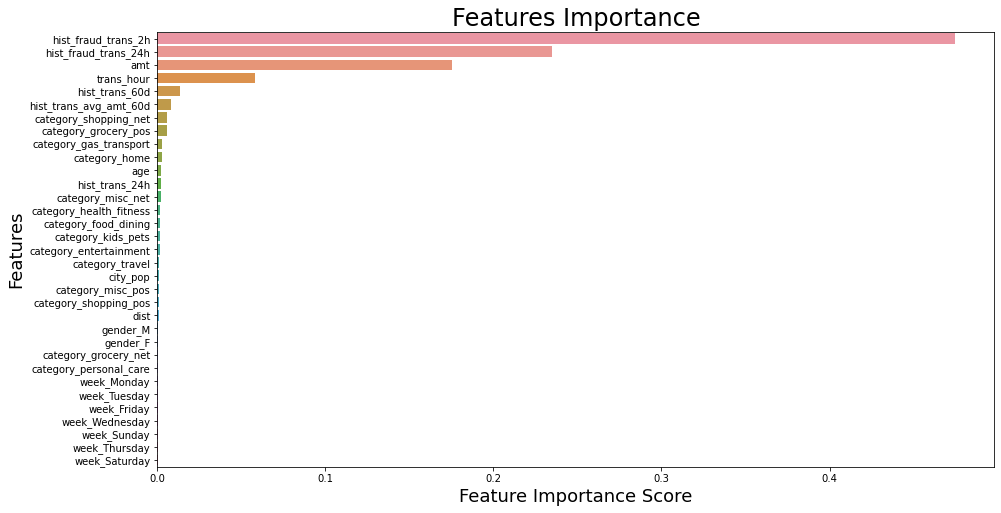

In [63]:
# set fig size
plt.figure(figsize=(15,8))
# Create a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to graph
plt.xlabel('Feature Importance Score', fontsize = 18)
plt.ylabel('Features', fontsize = 18)
plt.title("Features Importance", fontsize = 24)
#plt.legend(feature_imp)
plt.show()

#### END